<a href="https://colab.research.google.com/github/FatimahAlsulami/Happy_Helpers_Clinic-App/blob/main/Coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
train_data= pd.read_excel("train_dataset.xlsx")
train_data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,219.674262,22210.613083,5.875041,333.775777,398.517703,11.502316,112.412210,2.994259,0
1,6.783888,193.653581,13677.106441,5.171454,323.728663,477.854687,15.056064,66.396293,3.250022,0
2,6.010618,184.558582,15940.573271,8.165222,421.486089,314.529813,20.314617,83.707938,4.867287,1
3,8.097454,218.992436,18112.284447,6.196947,333.775777,376.569803,17.746264,59.909941,4.279082,1
4,8.072612,210.269780,16843.363927,8.793459,359.516169,559.167574,17.263576,68.738989,5.082206,0
...,...,...,...,...,...,...,...,...,...,...
2288,8.124208,207.509515,26489.114701,8.540837,318.059624,431.625677,10.075598,63.984225,4.724457,0
2289,10.391942,262.741770,39116.682706,3.205786,285.728420,473.313969,13.300688,65.318816,5.771715,0
2290,7.790875,196.478712,24061.349596,6.785685,350.117254,471.518536,15.343316,44.544627,3.076214,0
2291,6.139743,168.444214,23894.136010,9.494582,318.026087,494.129125,19.116022,60.264767,3.841222,0


# **Data exploration and visualization**

**Data exploration**

In [ ]:
#print first 5 rows
train_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,219.674262,22210.613083,5.875041,333.775777,398.517703,11.502316,112.412210,2.994259,0
1,6.783888,193.653581,13677.106441,5.171454,323.728663,477.854687,15.056064,66.396293,3.250022,0
2,6.010618,184.558582,15940.573271,8.165222,421.486089,314.529813,20.314617,83.707938,4.867287,1
3,8.097454,218.992436,18112.284447,6.196947,333.775777,376.569803,17.746264,59.909941,4.279082,1
4,8.072612,210.269780,16843.363927,8.793459,359.516169,559.167574,17.263576,68.738989,5.082206,0


In [ ]:
#print last 5 rows
train_data.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
2288,8.124208,207.509515,26489.114701,8.540837,318.059624,431.625677,10.075598,63.984225,4.724457,0
2289,10.391942,262.741770,39116.682706,3.205786,285.728420,473.313969,13.300688,65.318816,5.771715,0
2290,7.790875,196.478712,24061.349596,6.785685,350.117254,471.518536,15.343316,44.544627,3.076214,0
2291,6.139743,168.444214,23894.136010,9.494582,318.026087,494.129125,19.116022,60.264767,3.841222,0
2292,7.080795,143.300200,16263.167465,6.229737,333.775777,503.664085,19.585497,66.396293,3.451740,1


In [ ]:
#data information
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2293 non-null   float64
 1   Hardness         2293 non-null   float64
 2   Solids           2293 non-null   float64
 3   Chloramines      2293 non-null   float64
 4   Sulfate          2293 non-null   float64
 5   Conductivity     2293 non-null   float64
 6   Organic_carbon   2293 non-null   float64
 7   Trihalomethanes  2293 non-null   float64
 8   Turbidity        2293 non-null   float64
 9   Potability       2293 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 179.3 KB


In [ ]:
#discaibe of data (shows a summary of the numerical attributes)
from pandas.core import describe
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2293.0,7.082265,1.486029,0.000000,6.262799,7.080795,7.873272,14.000000
Hardness,2293.0,196.390335,32.460633,47.432000,176.753500,196.833001,216.441172,317.338124
Solids,2293.0,22074.335334,8668.693908,320.942611,15825.182571,21153.322827,27345.174288,56351.396304
Chloramines,2293.0,7.132987,1.573879,0.530351,6.140033,7.135063,8.104498,13.043806
Sulfate,2293.0,333.393347,36.116271,180.206746,316.552791,333.775777,349.985243,481.030642
Conductivity,2293.0,425.455702,80.266652,201.619737,363.974060,420.828362,480.715208,753.342620
Organic_carbon,2293.0,14.229174,3.341429,2.200000,12.015868,14.151538,16.450990,28.300000
Trihalomethanes,2293.0,66.499518,16.067742,0.738000,56.329076,66.396293,77.182622,124.000000
Turbidity,2293.0,3.967153,0.788480,1.450000,3.440753,3.947138,4.503661,6.739000
Potability,2293.0,0.390318,0.487928,0.000000,0.000000,0.000000,1.000000,1.000000


**Data visualization**

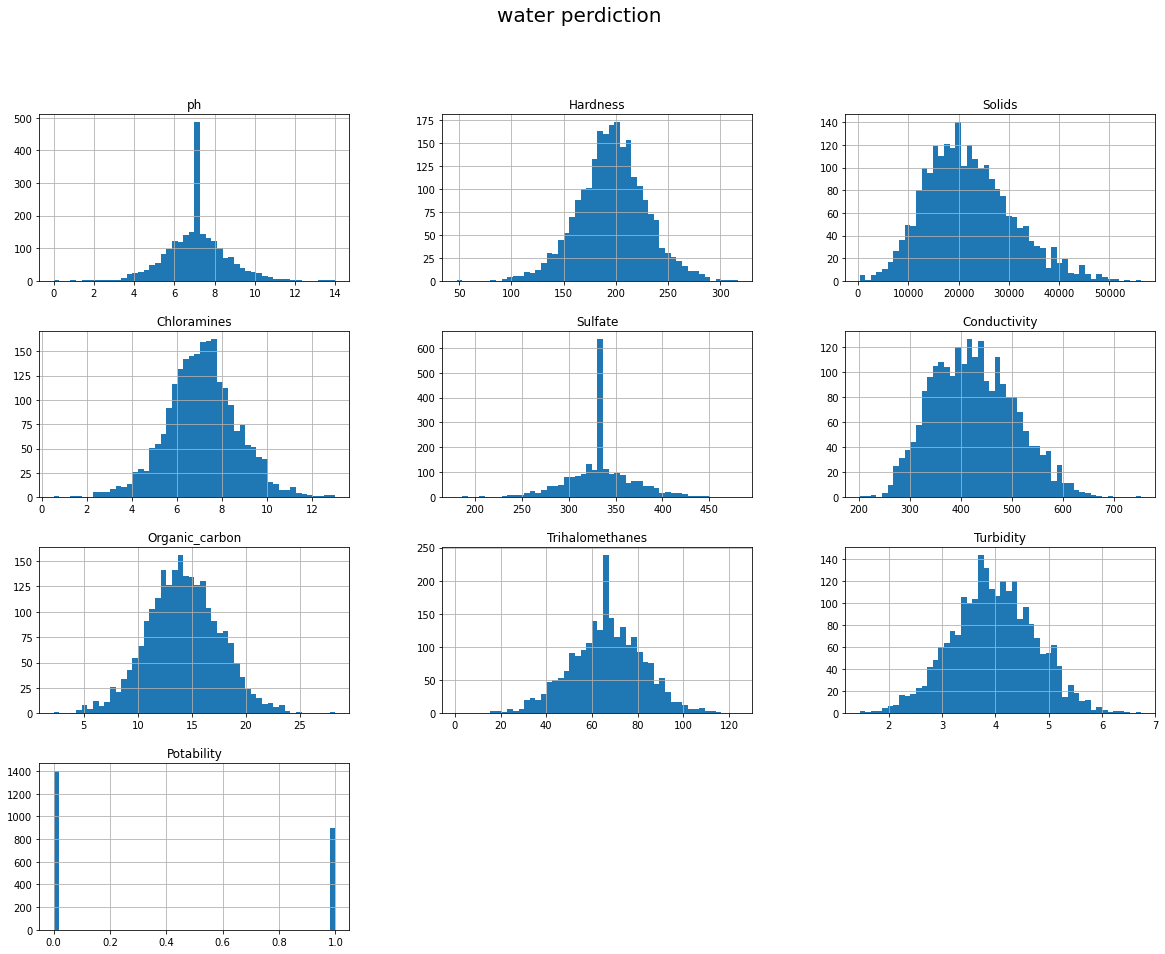

In [ ]:
# histogram for all atrributes 
train_data.hist(bins=50,figsize=(20,15))
plt.suptitle('water perdiction', fontsize=20)
plt.show()

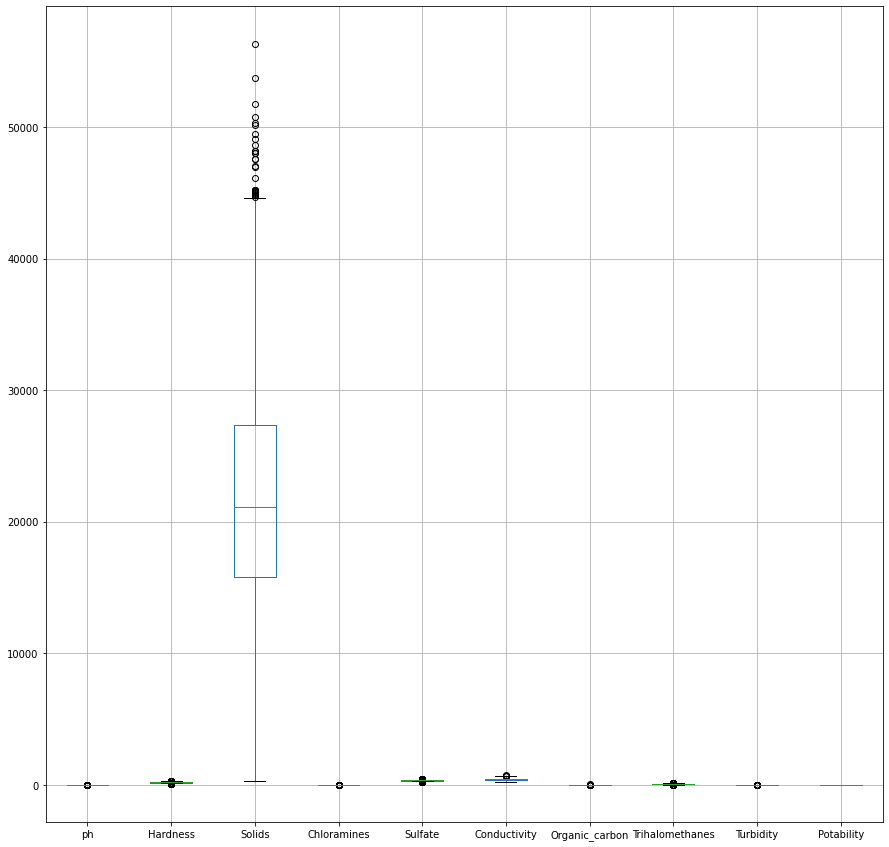

In [ ]:
# box plot of all numeric attributes
train_data.boxplot(figsize=(15,15)) 
plt.show()

In [ ]:
# count how many 0 and 1
Potability_values= train_data["Potability"].value_counts()
Potability_values
# data unballanced so we need to make it ballance 

0    1398
1     895
Name: Potability, dtype: int64

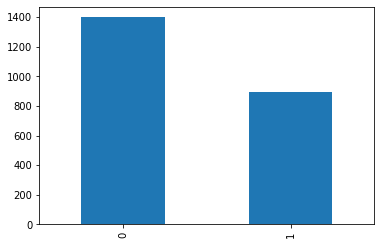

In [ ]:
# Showing the Potability information as a bar graph
train_data["Potability"].value_counts().plot(kind="bar")
plt.show()

In [ ]:
# calculate the correlations between attributes
corr_matrix=train_data.corr()
corr_matrix

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.085174,-0.086437,-0.036320,0.030671,0.029061,0.021283,0.002785,-0.037824,-0.007885
Hardness,0.085174,1.000000,-0.071467,-0.020923,-0.078125,-0.029706,-0.015270,-0.012477,-0.010564,-0.022519
Solids,-0.086437,-0.071467,1.000000,-0.069332,-0.141201,0.016573,0.013326,-0.001939,0.023191,0.051823
Chloramines,-0.036320,-0.020923,-0.069332,1.000000,0.031436,-0.008915,-0.025615,0.017490,-0.012488,0.014388
Sulfate,0.030671,-0.078125,-0.141201,0.031436,1.000000,-0.010235,0.019500,-0.041184,-0.009919,-0.019802
Conductivity,0.029061,-0.029706,0.016573,-0.008915,-0.010235,1.000000,0.019469,-0.013827,-0.001817,-0.018621
Organic_carbon,0.021283,-0.015270,0.013326,-0.025615,0.019500,0.019469,1.000000,-0.028303,-0.026839,-0.008574
Trihalomethanes,0.002785,-0.012477,-0.001939,0.017490,-0.041184,-0.013827,-0.028303,1.000000,-0.024693,0.002145
Turbidity,-0.037824,-0.010564,0.023191,-0.012488,-0.009919,-0.001817,-0.026839,-0.024693,1.000000,-0.002455
Potability,-0.007885,-0.022519,0.051823,0.014388,-0.019802,-0.018621,-0.008574,0.002145,-0.002455,1.000000


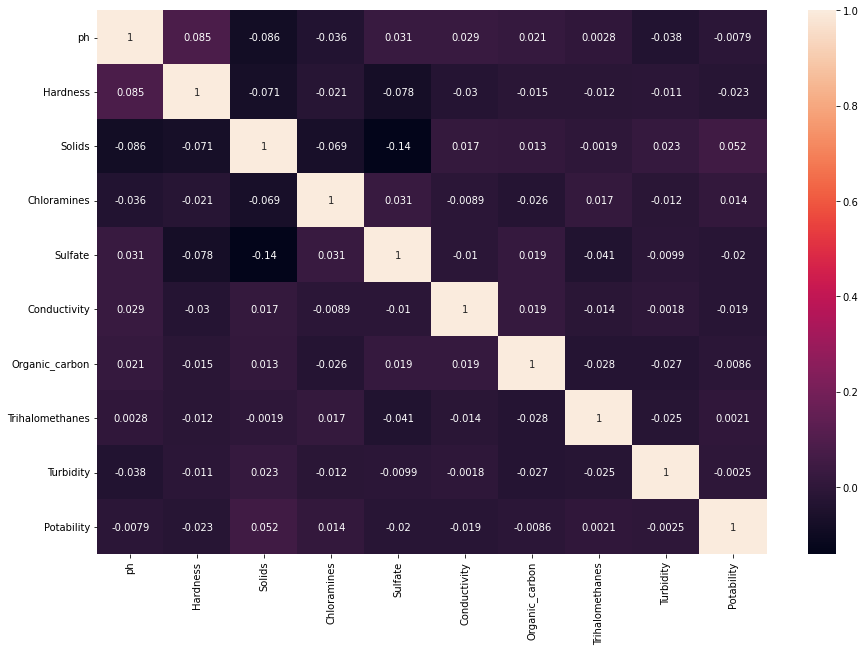

In [ ]:
# figure to show the correlation between the attributes
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix,annot=True)

<function matplotlib.pyplot.show(*args, **kw)>

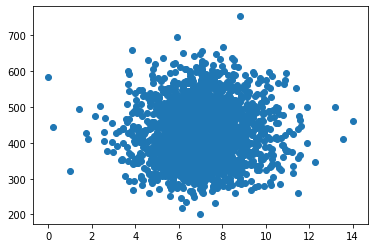

In [ ]:
#correlation between "ph" and "Conductivity" 
plt.scatter(train_data['ph'], train_data['Conductivity'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

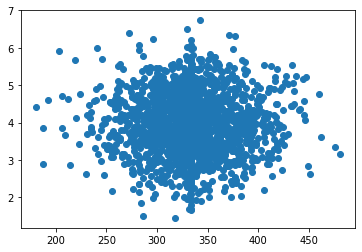

In [ ]:
#correlation between “Sulfate” and “Turbidity” 
plt.scatter(train_data['Sulfate'], train_data['Turbidity'])
plt.show

# **Data preproessing:**

**1. check of duplicate data:**

In [ ]:
# check if there is duplicate data
dup_rows = train_data[train_data.duplicated(subset=None, keep='first')]
# displaying data
dup_rows

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability


there is not duplaicate data

**2. check of missing values:**

In [ ]:
#Check if the data has missing values
train_data.isnull().sum(0)


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

there is not missing value

**Train\test split**

In [ ]:
TargetClass = train_data["Potability"]
TargetClass

0       0
1       0
2       1
3       1
4       0
       ..
2288    0
2289    0
2290    0
2291    0
2292    1
Name: Potability, Length: 2293, dtype: int64

In [ ]:
classWithoutTarget = train_data.drop(['Potability'], axis = 1)
classWithoutTarget

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,219.674262,22210.613083,5.875041,333.775777,398.517703,11.502316,112.412210,2.994259
1,6.783888,193.653581,13677.106441,5.171454,323.728663,477.854687,15.056064,66.396293,3.250022
2,6.010618,184.558582,15940.573271,8.165222,421.486089,314.529813,20.314617,83.707938,4.867287
3,8.097454,218.992436,18112.284447,6.196947,333.775777,376.569803,17.746264,59.909941,4.279082
4,8.072612,210.269780,16843.363927,8.793459,359.516169,559.167574,17.263576,68.738989,5.082206
...,...,...,...,...,...,...,...,...,...
2288,8.124208,207.509515,26489.114701,8.540837,318.059624,431.625677,10.075598,63.984225,4.724457
2289,10.391942,262.741770,39116.682706,3.205786,285.728420,473.313969,13.300688,65.318816,5.771715
2290,7.790875,196.478712,24061.349596,6.785685,350.117254,471.518536,15.343316,44.544627,3.076214
2291,6.139743,168.444214,23894.136010,9.494582,318.026087,494.129125,19.116022,60.264767,3.841222


In [ ]:
train_classWithoutTarget,test_classWithoutTarget,train_TargetClass,test_TargetClass = train_test_split(classWithoutTarget,TargetClass, test_size=0.20, random_state=42)

In [ ]:
train_classWithoutTarget.shape

(1834, 9)

In [ ]:
test_classWithoutTarget.shape

(459, 9)

In [ ]:
train_TargetClass.shape

(1834,)

In [ ]:
test_TargetClass.shape

(459,)

**3. Data transformation and scaling**

**scalling train:**

In [ ]:
scaler = StandardScaler()
scaler.fit(train_classWithoutTarget)
scaled=scaler.transform(train_classWithoutTarget)
water_scaled = pd.DataFrame(scaled, columns=train_classWithoutTarget.columns)
water_scaled

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.046772,-0.706544,0.999407,-1.542672,0.030977,1.268905,0.098169,-0.548231,0.426607
1,-0.112176,0.101600,-0.783011,-1.289409,0.030977,-1.490352,0.290544,1.490275,-0.874772
2,-0.022657,-0.069787,-0.606349,0.339844,0.489131,1.005865,1.629945,0.972165,-0.008433
3,0.002316,0.286365,0.582924,-1.989717,-0.958375,1.141775,-1.545358,-1.157619,0.120671
4,0.002316,0.953551,1.166178,-2.235558,-0.305782,0.106669,-0.760160,-0.596294,-0.496358
...,...,...,...,...,...,...,...,...,...
1829,-0.858316,-1.265078,0.336633,-0.403652,-0.991885,-1.393994,-0.755776,1.185920,0.909177
1830,-0.209384,-0.183488,-0.152715,-0.243352,0.030977,0.750889,-1.328451,1.248596,-1.558380
1831,0.314493,-0.179667,0.855874,0.445876,0.480923,1.251099,1.541874,0.804275,0.160956
1832,-0.283110,1.701565,-1.899929,2.525357,0.030977,-1.073883,-0.688474,0.615632,0.526869


**scalling test**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(test_classWithoutTarget)
scaled=scaler.transform(test_classWithoutTarget)
water_scaled_test = pd.DataFrame(scaled, columns=test_classWithoutTarget.columns)
water_scaled_test


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.006471,0.542475,0.304824,-0.607688,-2.468189,0.941086,0.665850,1.603438,2.240837
1,0.486085,1.033771,-0.047881,0.480825,-0.433590,-0.359397,1.218637,-1.553432,0.470165
2,-0.016087,-0.374901,0.704631,-0.286608,-0.152822,-0.566171,-0.955879,-0.246785,-0.689364
3,-1.030949,0.016826,-1.096402,-0.840656,-1.512769,0.205062,-0.004453,0.134283,0.590680
4,1.493800,-0.489800,-0.512538,-0.288804,-0.715070,-0.361022,-0.799781,-2.118876,0.162988
...,...,...,...,...,...,...,...,...,...
454,-0.262050,-0.147182,-0.484314,-1.969518,-1.095817,-0.466190,-1.367562,1.637029,1.466551
455,-0.867933,-1.415995,-1.163008,0.573769,0.156099,0.521142,0.466071,-0.516948,-0.194477
456,1.285970,0.367561,0.505812,0.144788,-0.196522,0.027168,-2.138338,1.399636,-1.358488
457,0.216693,0.714065,0.366210,1.128314,-0.069341,1.515217,1.075094,-0.335123,0.480246


**Features selection**

In [ ]:
rfe_model = RandomForestClassifier(random_state=42)
#select the best 7 features
rfe = RFE(estimator=rfe_model, n_features_to_select=7, step=1 )
rfe=rfe.fit(train_classWithoutTarget, train_TargetClass.values.ravel())
print("Ranking of features:\n",rfe.ranking_)
print("Number of selected features:",rfe.n_features_)

Ranking of features:
 [1 1 1 1 1 1 2 1 3]
Number of selected features: 7


selected (estimated best) features are assigned rank 1.

In [ ]:
X_train_rfe=rfe.transform(train_classWithoutTarget)
X_test_rfe= rfe.transform(test_classWithoutTarget)
X_train_rfe.shape

(1834, 7)

In [ ]:
rfe_model=rfe_model.fit(X_train_rfe, train_TargetClass)

In [ ]:
# name of the columns that are selected by RFE
cols = list(water_scaled.columns)
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Trihalomethanes'],
      dtype='object')


# **Model Training**:

**Random Forest cross validation:**

In [ ]:
#RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100,criterion="gini",min_samples_split=2,random_state=42,max_depth=20)
forest_clf = forest_clf.fit(X_train_rfe,train_TargetClass)
sco_forset = cross_val_score(forest_clf,X_train_rfe,train_TargetClass, cv=10,scoring="accuracy")
print("Accuracy of each fold:",sco_forset)
print("Mean of accuracy",sco_forset.mean())

Accuracy of each fold: [0.64673913 0.66847826 0.67391304 0.67934783 0.71584699 0.66120219
 0.72677596 0.66666667 0.67213115 0.69398907]
Mean of accuracy 0.6805090282727488


In [ ]:
sco_forset = cross_val_score(forest_clf,X_train_rfe,train_TargetClass, cv=10,scoring="precision")
print("Accuracy of each fold:",sco_forset)
print("Mean of accuracy",sco_forset.mean())

Accuracy of each fold: [0.57142857 0.60465116 0.63888889 0.65714286 0.72972973 0.58536585
 0.78787879 0.64516129 0.625      0.71875   ]
Mean of accuracy 0.656399714184065


**decision tree classifier** **cross validation:**

In [ ]:
#DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5,criterion="entropy",splitter="best",min_samples_split=3)
clf = clf.fit(X_train_rfe,train_TargetClass)
sco_clf = cross_val_score(clf,X_train_rfe,train_TargetClass, cv=10,scoring="accuracy")
print("Accuracy of each fold:",sco_clf)
print("Mean of accuracy",sco_clf.mean())

Accuracy of each fold: [0.63043478 0.61956522 0.67934783 0.60869565 0.67213115 0.6284153
 0.67213115 0.61202186 0.61202186 0.6010929 ]
Mean of accuracy 0.6335857685911143


In [ ]:
sco_clf = cross_val_score(clf,X_train_rfe,train_TargetClass, cv=10,scoring="precision")
print("Accuracy of each fold:",sco_clf)
print("Mean of accuracy",sco_clf.mean())

Accuracy of each fold: [0.5625     0.5        0.68965517 0.4516129  0.68       0.52380952
 0.69565217 0.47368421 0.48571429 0.44827586]
Mean of accuracy 0.5510904131671734


**Naive bayes cross validation:**

In [ ]:
#NaiveBayesClassifier
GNB = GaussianNB(var_smoothing=1e-9)
GNB.fit(X_train_rfe,train_TargetClass)
sco_GNB = cross_val_score(GNB,X_train_rfe,train_TargetClass, cv=10,scoring="accuracy")
print("Accuracy of each fold:",sco_GNB)
print("Mean of accuracy",sco_GNB.mean())

Accuracy of each fold: [0.67934783 0.5923913  0.66847826 0.6576087  0.65027322 0.54644809
 0.66120219 0.63387978 0.56284153 0.60655738]
Mean of accuracy 0.6259028272748871


In [ ]:
sco_GNB = cross_val_score(GNB,X_train_rfe,train_TargetClass, cv=10,scoring="precision")
print("Accuracy of each fold:",sco_GNB)
print("Mean of accuracy",sco_GNB.mean())

Accuracy of each fold: [0.68965517 0.4137931  0.66666667 0.64       0.58064516 0.29411765
 0.66666667 0.61538462 0.36111111 0.45454545]
Mean of accuracy 0.5382585598585728


# **Models' evaluation:**

**Random forset:**

In [ ]:
test_TargetClass_forest=forest_clf.predict(X_test_rfe)

In [ ]:
#precision_score
rf_p=precision_score(test_TargetClass, test_TargetClass_forest)
rf_p

0.6875

**GNB**

In [ ]:
test_TargetClass_GNB=GNB.predict(X_test_rfe)

In [ ]:
#precision_score
gnb_p=precision_score(test_TargetClass, test_TargetClass_GNB)
gnb_p

0.5375

**Decision Tree**

In [ ]:
test_TargetClass_CLF=clf.predict(X_test_rfe)

In [ ]:
#precision_score
dt_p=precision_score(test_TargetClass, test_TargetClass_CLF)
dt_p

0.7647058823529411

**Comparison of models’ performance using**

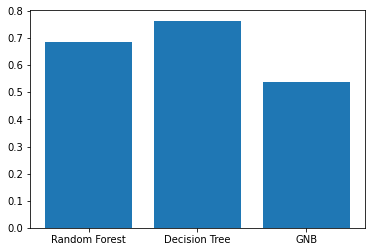

In [ ]:
classifiers=['Random Forest','Decision Tree','GNB']
precision = [rf_p,dt_p,gnb_p]
plt.bar(classifiers,precision)
plt.show()

**Which model we select and why:**

Decision Tree because it has larger precision compared to other models

# **test data:**

In [ ]:
test_data= pd.read_excel("test_dataset.xlsx")
test_data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,8.813505,236.392817,40684.390014,6.608775,303.529818,278.355123,14.576057,72.872697,4.242460
1,8.466013,224.174936,22523.124552,6.668868,286.943922,330.044715,17.744096,77.817804,3.946621
2,6.350290,190.383738,14905.393852,5.537830,333.775777,446.840605,13.983567,67.817096,4.265233
3,9.578227,205.748742,33080.588825,5.659848,356.698301,333.069911,16.984961,68.906088,3.419239
4,7.300990,182.447697,29136.338677,8.253015,333.775777,307.433303,8.730149,49.895342,4.596347
...,...,...,...,...,...,...,...,...,...
978,5.921247,200.943730,17397.402858,6.756200,279.202307,380.499818,11.255357,31.966297,3.746776
979,7.388519,201.057714,13921.146217,7.766495,333.775777,560.774729,14.467095,74.374018,4.409054
980,7.553845,212.264441,14319.401370,5.793012,362.852654,450.535910,18.176483,66.396293,4.374564
981,7.122637,183.402648,31295.902410,4.425026,333.775777,411.616070,14.066057,77.185792,3.750447


In [ ]:
#drpping unused features
testData=pd.DataFrame(test_data)
test_data2 = testData.drop(["Organic_carbon","Turbidity"], axis='columns')
print(test_data2)

           ph    Hardness        Solids  Chloramines     Sulfate  \
0    8.813505  236.392817  40684.390014     6.608775  303.529818   
1    8.466013  224.174936  22523.124552     6.668868  286.943922   
2    6.350290  190.383738  14905.393852     5.537830  333.775777   
3    9.578227  205.748742  33080.588825     5.659848  356.698301   
4    7.300990  182.447697  29136.338677     8.253015  333.775777   
..        ...         ...           ...          ...         ...   
978  5.921247  200.943730  17397.402858     6.756200  279.202307   
979  7.388519  201.057714  13921.146217     7.766495  333.775777   
980  7.553845  212.264441  14319.401370     5.793012  362.852654   
981  7.122637  183.402648  31295.902410     4.425026  333.775777   
982  8.370440  231.442553  15063.814968    12.279374  333.775777   

     Conductivity  Trihalomethanes  
0      278.355123        72.872697  
1      330.044715        77.817804  
2      446.840605        67.817096  
3      333.069911        68.906088 

In [ ]:
test_predict=clf.predict(test_data2)


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [ ]:
#test predect results 
print(test_predict)

[0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 